In [1]:
# Sample API
import flowx
import simulation
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 50, 100
xmin, xmax = -3.0, 7.0
ymin, ymax = -2.5, 2.5

# Define cell-centered variable names
center_vars   = ['pres', 'divv']
face_vars     = ['velc', 'hvar', 'ibmf']
ins_vars      = ['velc', 'hvar', 'divv', 'pres']
poisson_vars  = ['pres', 'divv']
imbound_vars  = ['ibmf', 'velc']

scalar_info   = {'tmax' : 10, 
                 'dt' : 0.01, 
                 'Re' : 100.0}

simulation_info = {'time_stepping' : 'ab2', 
                   'poisson_solver' : 'serial_cg', 
                   'maxiter' : 2000,
                   'tol' : 1e-10,
                   'with_ib' : True}

particle_info = [{'xo': 0.0, 'yo':  0.0, 'radius': 0.5, 'freq': [0.0,0.2]}]

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_center  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_facex = {'velc': ['dirichlet', 'outflow', 'neumann', 'neumann']}
bc_val_facex  = {'velc': [1.0, 0.0, 0.0, 0.0]}

bc_type_facey = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_facey  = {'velc': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info, particle_info, 
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

ins = flowx.ins_main(ins_vars, simulation_info)

poisson = flowx.poisson_main(poisson_vars, simulation_info)

imbound = flowx.imbound_main(imbound_vars, simulation_info)

In [3]:
simulation.set_initial_velocity(gridc, gridx, gridy, 'velc', 'pres')

------------ Time = 0.01 ---------------
Number of poisson iterations    : 422
Final poisson residual : 9.671615686926532e-11
Max, Min, U   : 1.4558728169473307, 0.29796875610339907
Max, Min, V   : 0.4377157422858652, -0.43771574229226495
Max, Min, P   : 28.50827881934565, -22.087451936893967
Max, Min, DIV : 5.297593028315284e-09, -5.209046423371166e-09


------------ Time = 0.02 ---------------
Number of poisson iterations    : 565
Final poisson residual : 8.741677020986095e-11
Max, Min, U   : 1.846050620526132, -0.20672523577037083
Max, Min, V   : 0.857020690617659, -0.9136676559710535
Max, Min, P   : 33.73168136061335, -31.53710989801685
Max, Min, DIV : 4.825481422863348e-09, -5.859051000443871e-09


------------ Time = 0.03 ---------------
Number of poisson iterations    : 555
Final poisson residual : 9.430027763431425e-11
Max, Min, U   : 2.1377547603879776, -0.17578407056331402
Max, Min, V   : 1.0799639004250925, -1.2277692328001932
Max, Min, P   : 17.319902539918008, -17.42597234

------------ Time = 0.25000000000000006 ---------------
Number of poisson iterations    : 478
Final poisson residual : 8.45900310034003e-11
Max, Min, U   : 2.3487915170851457, -0.16403797503730677
Max, Min, V   : 1.3043100366525906, -1.6471065862828542
Max, Min, P   : 1.8932808073572835, -4.106559046892568
Max, Min, DIV : 5.710755340837537e-09, -4.929839605115338e-09


------------ Time = 0.26000000000000006 ---------------
Number of poisson iterations    : 481
Final poisson residual : 9.138804304309343e-11
Max, Min, U   : 2.347747962463938, -0.22001708261698322
Max, Min, V   : 1.308085549783849, -1.6306631090147747
Max, Min, P   : 1.2621599289833245, -3.408108438781832
Max, Min, DIV : 5.328613869592935e-09, -5.980618717274511e-09


------------ Time = 0.2700000000000001 ---------------
Number of poisson iterations    : 480
Final poisson residual : 8.492849958310539e-11
Max, Min, U   : 2.3482619503889683, -0.2576719220098343
Max, Min, V   : 1.3356323375613424, -1.6130709012103066
Max, 

------------ Time = 0.48000000000000026 ---------------
Number of poisson iterations    : 489
Final poisson residual : 8.921927198985457e-11
Max, Min, U   : 2.2095549616360146, -0.5904122810791855
Max, Min, V   : 1.3355951550167262, -1.3967500085888365
Max, Min, P   : 0.8780437507459409, -2.8750279901272164
Max, Min, DIV : 6.479651197110331e-09, -6.374648983589054e-09


------------ Time = 0.49000000000000027 ---------------
Number of poisson iterations    : 474
Final poisson residual : 8.696737380594828e-11
Max, Min, U   : 2.1975075326058344, -0.6074293640084653
Max, Min, V   : 1.3341765945521973, -1.387204987304866
Max, Min, P   : 0.7159464338901818, -3.3756811163459357
Max, Min, DIV : 7.385864845069201e-09, -5.9850170566061456e-09


------------ Time = 0.5000000000000002 ---------------
Number of poisson iterations    : 483
Final poisson residual : 9.840774732454503e-11
Max, Min, U   : 2.1860053702014155, -0.6108643472867614
Max, Min, V   : 1.3307579429246106, -1.3777862044426534
Ma

------------ Time = 0.7100000000000004 ---------------
Number of poisson iterations    : 425
Final poisson residual : 9.463982929717085e-11
Max, Min, U   : 2.1568750013657874, -0.707076275527515
Max, Min, V   : 1.2428136601451616, -1.233704989353334
Max, Min, P   : 0.6819769101432885, -2.6017009052315867
Max, Min, DIV : 8.259655737141713e-09, -1.0353374338412102e-08


------------ Time = 0.7200000000000004 ---------------
Number of poisson iterations    : 463
Final poisson residual : 8.406725660861285e-11
Max, Min, U   : 2.154774862445001, -0.7046862316135435
Max, Min, V   : 1.2318258363145669, -1.2282324518346532
Max, Min, P   : 1.2999964139640907, -3.1810281409357795
Max, Min, DIV : 5.362519785861997e-09, -5.776841777507813e-09


------------ Time = 0.7300000000000004 ---------------
Number of poisson iterations    : 451
Final poisson residual : 8.935777627953705e-11
Max, Min, U   : 2.152550523173281, -0.7247423353330571
Max, Min, V   : 1.24183514031387, -1.2228014552218673
Max, Min,

------------ Time = 0.9400000000000006 ---------------
Number of poisson iterations    : 425
Final poisson residual : 9.755511112372471e-11
Max, Min, U   : 2.1125354958946128, -0.63245373747051
Max, Min, V   : 1.3979213095228158, -1.0910554641558736
Max, Min, P   : 0.643503514947606, -1.845487683651051
Max, Min, DIV : 6.9714874151305395e-09, -6.998330526197805e-09


------------ Time = 0.9500000000000006 ---------------
Number of poisson iterations    : 462
Final poisson residual : 9.282413240725972e-11
Max, Min, U   : 2.1165334978358317, -0.620780294531316
Max, Min, V   : 1.40487838776541, -1.0859585444169666
Max, Min, P   : 1.0882221238156466, -2.228138429419533
Max, Min, DIV : 5.6190078284723555e-09, -5.768417410401128e-09


------------ Time = 0.9600000000000006 ---------------
Number of poisson iterations    : 440
Final poisson residual : 7.662603918783419e-11
Max, Min, U   : 2.120186101271035, -0.6076321495929249
Max, Min, V   : 1.4116044598683906, -1.0815886823105594
Max, Min, P

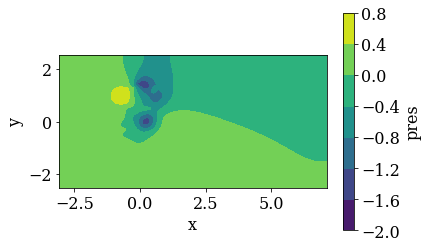

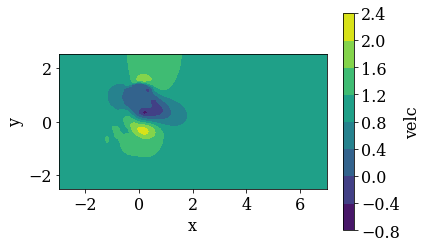

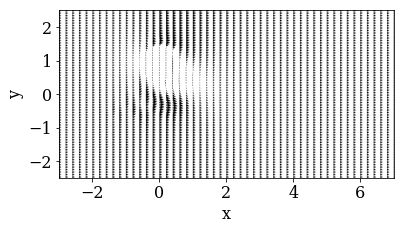

------------ Time = 1.0100000000000007 ---------------
Number of poisson iterations    : 429
Final poisson residual : 9.198053443362001e-11
Max, Min, U   : 2.12862601478306, -0.537902296616887
Max, Min, V   : 1.4245209674343138, -1.0541138652101727
Max, Min, P   : 0.5991224548416231, -1.7423503252814792
Max, Min, DIV : 6.45326916036415e-09, -5.72056233980045e-09


------------ Time = 1.0200000000000007 ---------------
Number of poisson iterations    : 458
Final poisson residual : 9.632368747327948e-11
Max, Min, U   : 2.1317526937636577, -0.5280175687744603
Max, Min, V   : 1.4256964220944635, -1.0486567564571811
Max, Min, P   : 0.639301009977936, -1.7125296753564871
Max, Min, DIV : 6.220226556052921e-09, -6.6200671611227335e-09


------------ Time = 1.0300000000000007 ---------------
Number of poisson iterations    : 434
Final poisson residual : 9.286479942587447e-11
Max, Min, U   : 2.134280209738861, -0.5176714782566629
Max, Min, V   : 1.4256764555739392, -1.0428367238218024
Max, Min, 

------------ Time = 1.2400000000000009 ---------------
Number of poisson iterations    : 416
Final poisson residual : 8.420453803062585e-11
Max, Min, U   : 2.126579419016901, -0.33125507583310143
Max, Min, V   : 1.4043524523460427, -0.9352106851734057
Max, Min, P   : 0.6049986646642314, -1.4321963326756073
Max, Min, DIV : 5.621438089326025e-09, -7.473007412536758e-09


------------ Time = 1.2500000000000009 ---------------
Number of poisson iterations    : 415
Final poisson residual : 9.227748205017512e-11
Max, Min, U   : 2.128426004962864, -0.3325538406454654
Max, Min, V   : 1.3991359259369065, -0.9303470057106097
Max, Min, P   : 0.6065282975668778, -1.4173313153985925
Max, Min, DIV : 6.58914291185031e-09, -5.715975789910566e-09


------------ Time = 1.260000000000001 ---------------
Number of poisson iterations    : 414
Final poisson residual : 9.33399630633665e-11
Max, Min, U   : 2.1296773325426877, -0.3375527023391494
Max, Min, V   : 1.3960417578725308, -0.9254924616539741
Max, Min

------------ Time = 1.490000000000001 ---------------
Number of poisson iterations    : 420
Final poisson residual : 9.271229306988194e-11
Max, Min, U   : 2.1145743150244947, -0.45847263579927194
Max, Min, V   : 1.162554555753128, -0.8457646433540797
Max, Min, P   : 0.6738738598824693, -1.5180242005448081
Max, Min, DIV : 7.005623858802323e-09, -7.158472538695837e-09


------------ Time = 1.500000000000001 ---------------
Number of poisson iterations    : 420
Final poisson residual : 8.31620490909289e-11
Max, Min, U   : 2.1159068055371466, -0.4636704868653741
Max, Min, V   : 1.1533246222266622, -0.8472791505397657
Max, Min, P   : 0.6574228173244522, -1.5514874866150965
Max, Min, DIV : 7.1535929957455835e-09, -8.396512929387256e-09


------------ Time = 1.5100000000000011 ---------------
Number of poisson iterations    : 429
Final poisson residual : 9.824241214515364e-11
Max, Min, U   : 2.1166965398494666, -0.4686608515942305
Max, Min, V   : 1.1440382705553893, -0.8493119044564457
Max, M

------------ Time = 1.7300000000000013 ---------------
Number of poisson iterations    : 445
Final poisson residual : 9.952542878462968e-11
Max, Min, U   : 2.0770280780253825, -0.5792421344849736
Max, Min, V   : 1.0665475780332108, -0.9655367214341101
Max, Min, P   : 0.8299274314893997, -1.6907625679723521
Max, Min, DIV : 6.660732521091006e-09, -6.772609695282483e-09


------------ Time = 1.7400000000000013 ---------------
Number of poisson iterations    : 472
Final poisson residual : 9.61578624839074e-11
Max, Min, U   : 2.077642119088285, -0.583916931195472
Max, Min, V   : 1.0655849402667679, -0.9864474793033778
Max, Min, P   : 1.1778393128616897, -1.730116523266278
Max, Min, DIV : 6.592062937182952e-09, -5.200291239293442e-09


------------ Time = 1.7500000000000013 ---------------
Number of poisson iterations    : 458
Final poisson residual : 9.47157696367658e-11
Max, Min, U   : 2.0778490799697855, -0.5891048393838407
Max, Min, V   : 1.0668949338608558, -1.0019488746673813
Max, Min,

------------ Time = 1.9600000000000015 ---------------
Number of poisson iterations    : 458
Final poisson residual : 8.995384061593947e-11
Max, Min, U   : 1.9978092294244116, -0.7256533437277363
Max, Min, V   : 1.0643589281729164, -1.208262519631762
Max, Min, P   : 1.14122345298205, -2.076139299415168
Max, Min, DIV : 6.443998132408396e-09, -5.467446495543982e-09


------------ Time = 1.9700000000000015 ---------------
Number of poisson iterations    : 429
Final poisson residual : 9.145756132576073e-11
Max, Min, U   : 1.9918381174513606, -0.7332549329317557
Max, Min, V   : 1.0620165379744628, -1.2120803211707032
Max, Min, P   : 1.1394447396951366, -2.077705223384197
Max, Min, DIV : 7.819712655177113e-09, -7.582798833283277e-09


------------ Time = 1.9800000000000015 ---------------
Number of poisson iterations    : 461
Final poisson residual : 9.996630037499047e-11
Max, Min, U   : 1.9844409513815726, -0.7407003401514597
Max, Min, V   : 1.0601054726664332, -1.2541481797304401
Max, Min,

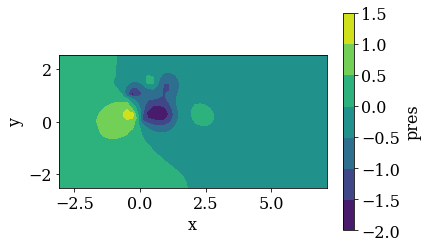

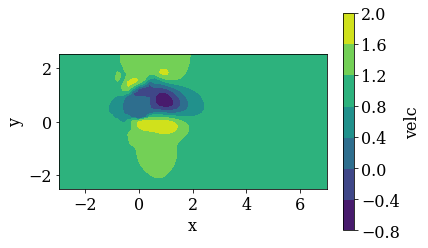

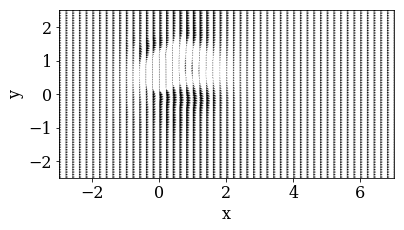

------------ Time = 2.010000000000001 ---------------
Number of poisson iterations    : 437
Final poisson residual : 8.560005647866869e-11
Max, Min, U   : 1.9716063645592625, -0.762643056019774
Max, Min, V   : 1.0599626252380556, -1.2521220019535126
Max, Min, P   : 1.2065865374744797, -2.252241721919853
Max, Min, DIV : 7.084102453952523e-09, -5.11349813187012e-09


------------ Time = 2.020000000000001 ---------------
Number of poisson iterations    : 433
Final poisson residual : 8.987400098774657e-11
Max, Min, U   : 1.9678269317431831, -0.7694413454288676
Max, Min, V   : 1.0583128457089053, -1.2571322286372666
Max, Min, P   : 1.1959552341760762, -2.2424461165599294
Max, Min, DIV : 6.255541640243223e-09, -6.3052654417083964e-09


------------ Time = 2.0300000000000007 ---------------
Number of poisson iterations    : 458
Final poisson residual : 9.539321928363758e-11
Max, Min, U   : 1.9624471428818107, -0.7759926353499516
Max, Min, V   : 1.0570926955148692, -1.3016286532387187
Max, Min

------------ Time = 2.259999999999996 ---------------
Number of poisson iterations    : 465
Final poisson residual : 9.493858553623161e-11
Max, Min, U   : 2.204352859470786, -0.8820997283541914
Max, Min, V   : 1.0309913651012168, -1.433952380689139
Max, Min, P   : 1.935623916215809, -3.108604354117945
Max, Min, DIV : 5.707049707814882e-09, -6.010686987197034e-09


------------ Time = 2.2699999999999956 ---------------
Number of poisson iterations    : 461
Final poisson residual : 9.220407077947213e-11
Max, Min, U   : 2.201346832502295, -0.8846863712213731
Max, Min, V   : 1.0287951293162854, -1.4257520068336518
Max, Min, P   : 1.5020326946916478, -2.7632580072298136
Max, Min, DIV : 4.78860132102632e-09, -5.324419412311432e-09


------------ Time = 2.2799999999999954 ---------------
Number of poisson iterations    : 472
Final poisson residual : 8.962371139349293e-11
Max, Min, U   : 2.180820178665146, -0.8874386747704153
Max, Min, V   : 1.026109080346431, -1.4074213070357118
Max, Min, P  

------------ Time = 2.489999999999991 ---------------
Number of poisson iterations    : 482
Final poisson residual : 9.681611667997068e-11
Max, Min, U   : 2.273989965263733, -0.8980950767298357
Max, Min, V   : 0.9867815846939699, -1.531071054165528
Max, Min, P   : 1.309651556536901, -3.45976242357434
Max, Min, DIV : 7.656292821955901e-09, -7.2118164218260006e-09


------------ Time = 2.4999999999999907 ---------------
Number of poisson iterations    : 520
Final poisson residual : 9.365691274640917e-11
Max, Min, U   : 2.303436856754411, -0.8965383914662197
Max, Min, V   : 0.9866949847365596, -1.5404678295024536
Max, Min, P   : 2.0285025111448354, -4.060353592139182
Max, Min, DIV : 8.005556634271827e-09, -6.678829989059665e-09


------------ Time = 2.5099999999999905 ---------------
Number of poisson iterations    : 468
Final poisson residual : 9.999662052474812e-11
Max, Min, U   : 2.302456153567141, -0.8944743552057988
Max, Min, V   : 0.9861521943294826, -1.5476683849116335
Max, Min, P 

------------ Time = 2.7399999999999856 ---------------
Number of poisson iterations    : 520
Final poisson residual : 9.363247040611806e-11
Max, Min, U   : 2.189404045570419, -0.8457732946016107
Max, Min, V   : 0.965526455626108, -1.728536714276832
Max, Min, P   : 1.9980910179221214, -3.8999490514565633
Max, Min, DIV : 6.698365473400969e-09, -6.088968496076319e-09


------------ Time = 2.7499999999999853 ---------------
Number of poisson iterations    : 464
Final poisson residual : 9.93766219141157e-11
Max, Min, U   : 2.191709811255243, -0.8419682968099187
Max, Min, V   : 0.9645449755373636, -1.7347842089050851
Max, Min, P   : 1.9642224321390176, -3.1924760493728717
Max, Min, DIV : 4.643205264720507e-09, -5.621068756289649e-09


------------ Time = 2.759999999999985 ---------------
Number of poisson iterations    : 478
Final poisson residual : 9.309123866055214e-11
Max, Min, U   : 2.1778602885005247, -0.8384560966912064
Max, Min, V   : 0.9623666938700866, -1.7397781264476229
Max, Min, 

------------ Time = 2.9699999999999807 ---------------
Number of poisson iterations    : 479
Final poisson residual : 9.107051863661488e-11
Max, Min, U   : 2.1676379185694215, -0.7370160515190975
Max, Min, V   : 0.960331685779421, -1.8556876580587771
Max, Min, P   : 1.5370619701494783, -2.6790338488564616
Max, Min, DIV : 4.885040653240802e-09, -5.410164712060794e-09


------------ Time = 2.9799999999999804 ---------------
Number of poisson iterations    : 459
Final poisson residual : 9.07868165829827e-11
Max, Min, U   : 2.1570471304480954, -0.7314767647475595
Max, Min, V   : 0.9591913271232898, -1.8536811451888804
Max, Min, P   : 1.2019152482382702, -2.300037723173594
Max, Min, DIV : 5.5620864164440675e-09, -6.493491196135626e-09


------------ Time = 2.9899999999999802 ---------------
Number of poisson iterations    : 465
Final poisson residual : 8.441824746337022e-11
Max, Min, U   : 2.15257766922944, -0.7260928631308081
Max, Min, V   : 0.9582409826848638, -1.8625075313221824
Max, Min

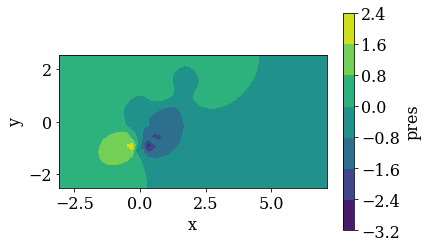

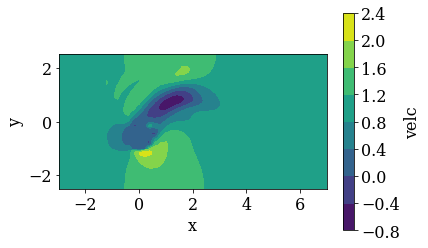

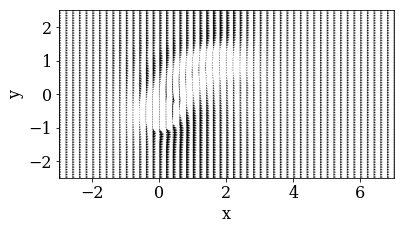

------------ Time = 3.00999999999998 ---------------
Number of poisson iterations    : 440
Final poisson residual : 9.700600437416899e-11
Max, Min, U   : 2.1859004248453164, -0.7134570530423766
Max, Min, V   : 0.9596308972216585, -1.8812040445904858
Max, Min, P   : 1.9247128668957898, -2.7317626961453665
Max, Min, DIV : 5.632284780059116e-09, -6.169383250792526e-09


------------ Time = 3.0199999999999796 ---------------
Number of poisson iterations    : 470
Final poisson residual : 9.377909743863302e-11
Max, Min, U   : 2.1701946119241846, -0.7071187230954339
Max, Min, V   : 0.9589370613263938, -1.880776252106967
Max, Min, P   : 1.317170618637323, -2.3078485894683864
Max, Min, DIV : 5.401333737914404e-09, -5.26197418970753e-09


------------ Time = 3.0299999999999794 ---------------
Number of poisson iterations    : 453
Final poisson residual : 9.771211805067801e-11
Max, Min, U   : 2.159319891121476, -0.7007458243789519
Max, Min, V   : 0.9574592066779318, -1.878625943098709
Max, Min, P

------------ Time = 3.2499999999999747 ---------------
Number of poisson iterations    : 447
Final poisson residual : 9.259781662138419e-11
Max, Min, U   : 2.037686896417181, -0.5386856133785802
Max, Min, V   : 0.9459003619353508, -2.0151290419182035
Max, Min, P   : 0.9269999661659927, -1.9780182620673996
Max, Min, DIV : 6.548145220497403e-09, -6.76255752785071e-09


------------ Time = 3.2599999999999745 ---------------
Number of poisson iterations    : 456
Final poisson residual : 8.901107807898887e-11
Max, Min, U   : 2.0241865330840123, -0.5320696698213445
Max, Min, V   : 0.9465550368848186, -2.0040438481114644
Max, Min, P   : 1.15494996900067, -1.5276164743909086
Max, Min, DIV : 5.939791991593779e-09, -6.217310052208935e-09


------------ Time = 3.2699999999999743 ---------------
Number of poisson iterations    : 433
Final poisson residual : 8.896026078116152e-11
Max, Min, U   : 2.0087694914372327, -0.5250699782043049
Max, Min, V   : 0.9464564085195731, -2.0164712101945175
Max, Min

------------ Time = 3.4999999999999694 ---------------
Number of poisson iterations    : 428
Final poisson residual : 8.628973306309138e-11
Max, Min, U   : 1.9187369552875957, -0.3356009304784118
Max, Min, V   : 0.9269095857343378, -2.034155273489967
Max, Min, P   : 0.7454186542029683, -2.205897692374399
Max, Min, DIV : 7.358476914604006e-09, -6.867815205424677e-09


------------ Time = 3.509999999999969 ---------------
Number of poisson iterations    : 428
Final poisson residual : 9.506948830286153e-11
Max, Min, U   : 1.9193198776627904, -0.32834215393750155
Max, Min, V   : 0.9251300303935892, -2.0354639135808235
Max, Min, P   : 0.7335226454585491, -2.2646388311694383
Max, Min, DIV : 7.90524756766331e-09, -7.413396119204663e-09


------------ Time = 3.519999999999969 ---------------
Number of poisson iterations    : 459
Final poisson residual : 9.797259357244319e-11
Max, Min, U   : 1.919027789872048, -0.3209802542381427
Max, Min, V   : 0.9250277698298071, -2.030127052582415
Max, Min, 

------------ Time = 3.7299999999999645 ---------------
Number of poisson iterations    : 420
Final poisson residual : 9.868233836531329e-11
Max, Min, U   : 1.9632570489740102, -0.15270488551985886
Max, Min, V   : 0.906327435202671, -2.012478740352154
Max, Min, P   : 0.6955337011205762, -2.215880435856223
Max, Min, DIV : 7.156131069663285e-09, -7.396426110473087e-09


------------ Time = 3.7399999999999642 ---------------
Number of poisson iterations    : 421
Final poisson residual : 8.254552070244863e-11
Max, Min, U   : 1.9641358156607247, -0.15920459723586566
Max, Min, V   : 0.9058387727755074, -2.023746526199718
Max, Min, P   : 0.6949000029152599, -2.2102576960983917
Max, Min, DIV : 6.840459917251129e-09, -5.977290984220118e-09


------------ Time = 3.749999999999964 ---------------
Number of poisson iterations    : 421
Final poisson residual : 8.294194439170511e-11
Max, Min, U   : 1.9637517039842118, -0.16464946407306416
Max, Min, V   : 0.905320620410895, -2.0344100811397583
Max, Mi

------------ Time = 3.9599999999999596 ---------------
Number of poisson iterations    : 455
Final poisson residual : 8.814396258237025e-11
Max, Min, U   : 2.017842242718598, -0.20364277347912327
Max, Min, V   : 0.9061397110377538, -2.1261548344763033
Max, Min, P   : 0.836536325085675, -1.8841198491487072
Max, Min, DIV : 6.7216396337776985e-09, -6.5637074074531565e-09


------------ Time = 3.9699999999999593 ---------------
Number of poisson iterations    : 447
Final poisson residual : 9.444454495810097e-11
Max, Min, U   : 2.017742416633245, -0.20780748715200364
Max, Min, V   : 0.9048293819790715, -2.123694282018754
Max, Min, P   : 0.7768624897562555, -1.8174408952347108
Max, Min, DIV : 5.461801670658684e-09, -5.173869110919327e-09


------------ Time = 3.979999999999959 ---------------
Number of poisson iterations    : 435
Final poisson residual : 9.884248032498436e-11
Max, Min, U   : 2.0211861733787226, -0.21345481193525678
Max, Min, V   : 0.903147475283209, -2.120241019715273
Max, M

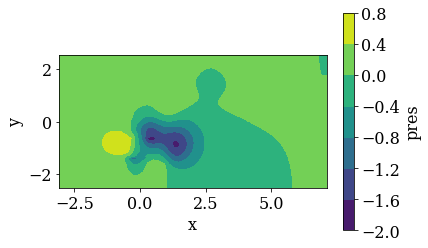

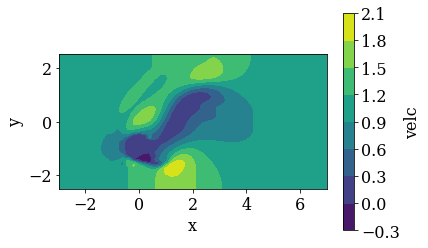

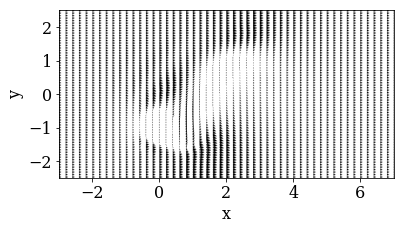

------------ Time = 4.009999999999959 ---------------
Number of poisson iterations    : 424
Final poisson residual : 9.818639889214622e-11
Max, Min, U   : 2.0237767175012507, -0.23236126539482146
Max, Min, V   : 0.8964922026572554, -2.1054099531970647
Max, Min, P   : 0.7210376091983948, -1.9241813648829866
Max, Min, DIV : 9.427085778668243e-09, -8.333204959409812e-09


------------ Time = 4.019999999999959 ---------------
Number of poisson iterations    : 400
Final poisson residual : 9.287885897613725e-11
Max, Min, U   : 2.0214490974923884, -0.23897927939679464
Max, Min, V   : 0.8938515662381539, -2.0993071964833074
Max, Min, P   : 0.7252593780196871, -1.9331568197551694
Max, Min, DIV : 7.566445248130549e-09, -7.326739492885537e-09


------------ Time = 4.0299999999999585 ---------------
Number of poisson iterations    : 456
Final poisson residual : 8.957498152742205e-11
Max, Min, U   : 2.0210373385293354, -0.24331651438554247
Max, Min, V   : 0.8913512604046369, -2.093483826627061
Max,

------------ Time = 4.249999999999954 ---------------
Number of poisson iterations    : 472
Final poisson residual : 9.051800937274991e-11
Max, Min, U   : 2.0849449390847927, -0.3159051575408027
Max, Min, V   : 1.1182912126923892, -2.162092825155313
Max, Min, P   : 1.5262174570207774, -3.2512801161052938
Max, Min, DIV : 4.8895892890143955e-09, -5.206635733667753e-09


------------ Time = 4.259999999999954 ---------------
Number of poisson iterations    : 474
Final poisson residual : 9.123213625218007e-11
Max, Min, U   : 2.083967955244163, -0.3165421423832348
Max, Min, V   : 1.1284448198262362, -2.1583537803960207
Max, Min, P   : 1.128464147331948, -2.613179546567181
Max, Min, DIV : 5.693563068925878e-09, -5.944219561015984e-09


------------ Time = 4.269999999999953 ---------------
Number of poisson iterations    : 466
Final poisson residual : 9.602327394129105e-11
Max, Min, U   : 2.090460736315305, -0.3169352343431401
Max, Min, V   : 1.135144539763837, -2.155367894758912
Max, Min, P  

------------ Time = 4.489999999999949 ---------------
Number of poisson iterations    : 457
Final poisson residual : 9.841144589047787e-11
Max, Min, U   : 2.2469112733501233, -0.3365372433898099
Max, Min, V   : 1.3617363705560175, -2.0252756401908703
Max, Min, P   : 1.8978367526798514, -3.752994188486125
Max, Min, DIV : 5.099983768630523e-09, -5.427066851471096e-09


------------ Time = 4.4999999999999485 ---------------
Number of poisson iterations    : 476
Final poisson residual : 8.974440795725671e-11
Max, Min, U   : 2.2576060673292955, -0.33841990273318867
Max, Min, V   : 1.3606357562025657, -2.0263610685768083
Max, Min, P   : 1.4393067959599066, -3.1691632198925603
Max, Min, DIV : 6.731513194080385e-09, -6.033735247545913e-09


------------ Time = 4.509999999999948 ---------------
Number of poisson iterations    : 468
Final poisson residual : 9.153874772596573e-11
Max, Min, U   : 2.255814795300635, -0.33943241484262515
Max, Min, V   : 1.3599141607267107, -2.026762898814976
Max, Mi

------------ Time = 4.719999999999944 ---------------
Number of poisson iterations    : 470
Final poisson residual : 9.085995943246955e-11
Max, Min, U   : 2.3395164873089835, -0.3095151830167043
Max, Min, V   : 1.5121565757471613, -1.8485444191695866
Max, Min, P   : 2.212309066601226, -4.063985257750565
Max, Min, DIV : 5.5997384160177965e-09, -6.331303495366036e-09


------------ Time = 4.729999999999944 ---------------
Number of poisson iterations    : 462
Final poisson residual : 8.360762400857766e-11
Max, Min, U   : 2.335628147922951, -0.3116285926211337
Max, Min, V   : 1.4969084170405957, -1.8328456402578446
Max, Min, P   : 1.653688555831518, -3.395798532211533
Max, Min, DIV : 5.281070789009412e-09, -4.750319582136342e-09


------------ Time = 4.739999999999943 ---------------
Number of poisson iterations    : 508
Final poisson residual : 8.943212461215442e-11
Max, Min, U   : 2.3088582112969167, -0.3118619432380642
Max, Min, V   : 1.467291450104268, -1.829877191071437
Max, Min, P  

------------ Time = 4.959999999999939 ---------------
Number of poisson iterations    : 522
Final poisson residual : 9.348213250867989e-11
Max, Min, U   : 2.3660327058502593, -0.2566097452408338
Max, Min, V   : 1.6381102348940844, -1.7296499060021142
Max, Min, P   : 2.25301188579278, -4.470820203174016
Max, Min, DIV : 7.643480154362337e-09, -6.22633562763486e-09


------------ Time = 4.9699999999999385 ---------------
Number of poisson iterations    : 474
Final poisson residual : 9.80922988430019e-11
Max, Min, U   : 2.3702165800948762, -0.24814786057626018
Max, Min, V   : 1.655300256331338, -1.7167557806114755
Max, Min, P   : 2.1465013656477208, -3.6532614006923323
Max, Min, DIV : 6.97378281511174e-09, -5.305728127680265e-09


------------ Time = 4.979999999999938 ---------------
Number of poisson iterations    : 479
Final poisson residual : 8.792209960573395e-11
Max, Min, U   : 2.3647252803569248, -0.24685449935497678
Max, Min, V   : 1.6692349322283249, -1.7037873267745294
Max, Min, P

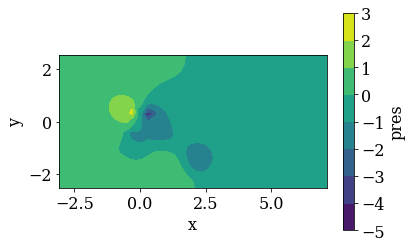

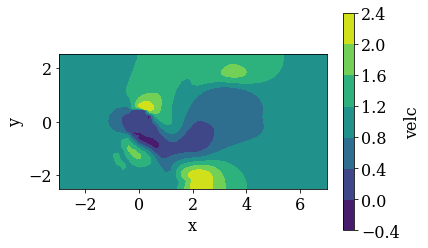

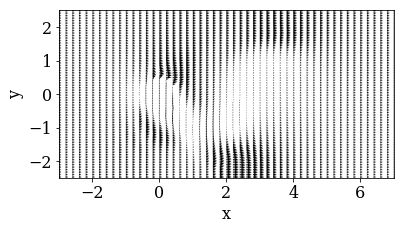

------------ Time = 5.009999999999938 ---------------
Number of poisson iterations    : 475
Final poisson residual : 8.493945545291015e-11
Max, Min, U   : 2.380597332686741, -0.23666615795855736
Max, Min, V   : 1.7121592784533841, -1.6620903145740538
Max, Min, P   : 2.126339129131018, -3.5384300486117417
Max, Min, DIV : 7.086267544975655e-09, -7.181144456858135e-09


------------ Time = 5.019999999999937 ---------------
Number of poisson iterations    : 479
Final poisson residual : 9.013681719757183e-11
Max, Min, U   : 2.3739001808005376, -0.23664411443246716
Max, Min, V   : 1.7238227135288278, -1.6484247338986742
Max, Min, P   : 1.5877121804941658, -3.1306451984736414
Max, Min, DIV : 6.80348176407275e-09, -6.644971309310854e-09


------------ Time = 5.029999999999937 ---------------
Number of poisson iterations    : 512
Final poisson residual : 9.528278549726684e-11
Max, Min, U   : 2.3504502585313256, -0.23850419569552667
Max, Min, V   : 1.7345955802851414, -1.6510174912613202
Max, Mi

------------ Time = 5.239999999999933 ---------------
Number of poisson iterations    : 520
Final poisson residual : 9.679445727280558e-11
Max, Min, U   : 2.4264939560312944, -0.2166298805946038
Max, Min, V   : 1.9603191893920118, -1.5534647793130956
Max, Min, P   : 2.1365864043608465, -3.7532031562310797
Max, Min, DIV : 6.886900664332396e-09, -6.210875980183772e-09


------------ Time = 5.2499999999999325 ---------------
Number of poisson iterations    : 466
Final poisson residual : 9.145700618521129e-11
Max, Min, U   : 2.4306209928594527, -0.2219793576206232
Max, Min, V   : 1.9725817475127805, -1.541722886652167
Max, Min, P   : 1.9608368348097307, -2.9754650594516607
Max, Min, DIV : 5.742623820914616e-09, -4.635588163326432e-09


------------ Time = 5.259999999999932 ---------------
Number of poisson iterations    : 479
Final poisson residual : 8.458823849785956e-11
Max, Min, U   : 2.435955562535976, -0.224761576644989
Max, Min, V   : 1.9849679365103725, -1.5301396721497489
Max, Min,

------------ Time = 5.469999999999928 ---------------
Number of poisson iterations    : 478
Final poisson residual : 9.687774332252632e-11
Max, Min, U   : 2.5424979802728753, -0.27452816574965905
Max, Min, V   : 2.113001185602724, -1.441576843183064
Max, Min, P   : 1.5132745622052208, -2.2692612410839277
Max, Min, DIV : 5.259950808245151e-09, -5.379611200950762e-09


------------ Time = 5.479999999999928 ---------------
Number of poisson iterations    : 456
Final poisson residual : 9.653051233232744e-11
Max, Min, U   : 2.5496758579856076, -0.2726187356790538
Max, Min, V   : 2.110497232601595, -1.4323148030724895
Max, Min, P   : 1.1802152820562963, -1.8886955138927344
Max, Min, DIV : 5.487630613809635e-09, -6.169915134357495e-09


------------ Time = 5.489999999999927 ---------------
Number of poisson iterations    : 469
Final poisson residual : 9.317362141623998e-11
Max, Min, U   : 2.556360814881362, -0.2778469992803835
Max, Min, V   : 2.10620746133671, -1.4225530942410014
Max, Min, P 

------------ Time = 5.709999999999923 ---------------
Number of poisson iterations    : 450
Final poisson residual : 9.128762137998992e-11
Max, Min, U   : 2.6394182247447624, -0.31595456601468414
Max, Min, V   : 2.091415026577651, -1.3356279549791543
Max, Min, P   : 1.1311124141814861, -1.601101069338022
Max, Min, DIV : 8.869199819017126e-09, -7.357337017399601e-09


------------ Time = 5.7199999999999225 ---------------
Number of poisson iterations    : 450
Final poisson residual : 9.597677006943855e-11
Max, Min, U   : 2.6414333346429397, -0.3182146891502669
Max, Min, V   : 2.096455731873639, -1.3353296586728751
Max, Min, P   : 1.6746466057396652, -1.6521597953926375
Max, Min, DIV : 6.3628291524508995e-09, -6.200461671879154e-09


------------ Time = 5.729999999999922 ---------------
Number of poisson iterations    : 453
Final poisson residual : 9.786851098668041e-11
Max, Min, U   : 2.642654472264177, -0.32536582429839994
Max, Min, V   : 2.1006850493370206, -1.3346374042357025
Max, Mi

------------ Time = 5.949999999999918 ---------------
Number of poisson iterations    : 463
Final poisson residual : 9.198319647110855e-11
Max, Min, U   : 2.6839619985323613, -0.35851886139065875
Max, Min, V   : 2.195896120738335, -1.2542466486024035
Max, Min, P   : 1.3684571863970805, -1.61400081394237
Max, Min, DIV : 6.119391868231183e-09, -5.777692713149207e-09


------------ Time = 5.959999999999917 ---------------
Number of poisson iterations    : 450
Final poisson residual : 9.984843126478974e-11
Max, Min, U   : 2.6892382122367318, -0.3579429280258428
Max, Min, V   : 2.199769099246928, -1.252067660933737
Max, Min, P   : 1.3548792476486269, -1.613841390711666
Max, Min, DIV : 5.212477116600667e-09, -6.021702025904574e-09


------------ Time = 5.969999999999917 ---------------
Number of poisson iterations    : 455
Final poisson residual : 9.390553034601617e-11
Max, Min, U   : 2.6937067874801177, -0.35522547662411014
Max, Min, V   : 2.200368423959921, -1.2496135364813503
Max, Min, P 

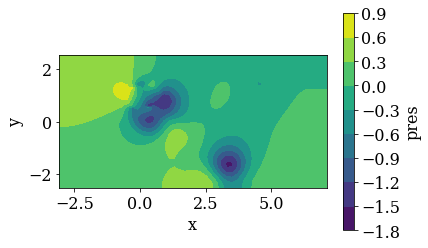

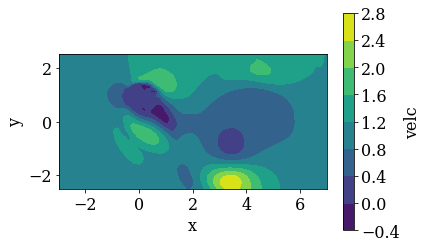

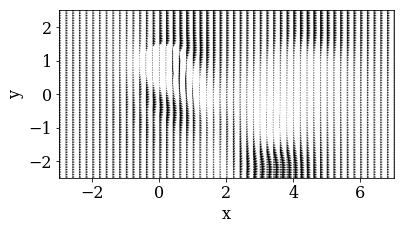

------------ Time = 6.009999999999916 ---------------
Number of poisson iterations    : 428
Final poisson residual : 9.728360323995532e-11
Max, Min, U   : 2.703344416626926, -0.3372586850276907
Max, Min, V   : 2.2035662714415545, -1.23687597851178
Max, Min, P   : 0.7844664124815651, -1.5361376756537224
Max, Min, DIV : 6.25210827553957e-09, -6.3396515814773124e-09


------------ Time = 6.019999999999916 ---------------
Number of poisson iterations    : 440
Final poisson residual : 8.403177370314089e-11
Max, Min, U   : 2.703653097553824, -0.3377399942409813
Max, Min, V   : 2.2032232230597133, -1.2329462081135563
Max, Min, P   : 0.8940060341435828, -1.5392382737034862
Max, Min, DIV : 4.836995345924855e-09, -6.827464149594675e-09


------------ Time = 6.029999999999916 ---------------
Number of poisson iterations    : 444
Final poisson residual : 9.921679732002544e-11
Max, Min, U   : 2.703097328575089, -0.34273109598449253
Max, Min, V   : 2.2008591861976017, -1.2287277341224299
Max, Min, P

------------ Time = 6.249999999999911 ---------------
Number of poisson iterations    : 425
Final poisson residual : 9.364041097478703e-11
Max, Min, U   : 2.7043533451614152, -0.5281241201070058
Max, Min, V   : 2.1942232124310697, -1.142792191686622
Max, Min, P   : 0.7431305950781956, -1.7000112983852096
Max, Min, DIV : 7.722105004048796e-09, -6.262841079074377e-09


------------ Time = 6.259999999999911 ---------------
Number of poisson iterations    : 425
Final poisson residual : 8.88994053597079e-11
Max, Min, U   : 2.709841828499572, -0.5295296989641229
Max, Min, V   : 2.1986077863224374, -1.137958167024133
Max, Min, P   : 0.7439178961770717, -1.7110727422068717
Max, Min, DIV : 7.838777456997681e-09, -6.428249460510571e-09


------------ Time = 6.269999999999911 ---------------
Number of poisson iterations    : 482
Final poisson residual : 9.731493364863038e-11
Max, Min, U   : 2.7147666747956953, -0.5309647730540478
Max, Min, V   : 2.202750239152465, -1.132859566115902
Max, Min, P  

------------ Time = 6.499999999999906 ---------------
Number of poisson iterations    : 447
Final poisson residual : 9.998360471128529e-11
Max, Min, U   : 2.734791689735014, -0.5024441954193334
Max, Min, V   : 2.1391009465277295, -1.0475847274783678
Max, Min, P   : 0.7824456333088649, -1.7863778817352596
Max, Min, DIV : 7.0279704278419786e-09, -1.0508320741342558e-08


------------ Time = 6.509999999999906 ---------------
Number of poisson iterations    : 435
Final poisson residual : 9.755827031818268e-11
Max, Min, U   : 2.7338762092356457, -0.49199959856676856
Max, Min, V   : 2.1317370812514866, -1.0450941372408082
Max, Min, P   : 0.7859669801925007, -1.779628300744256
Max, Min, DIV : 7.322921713459607e-09, -6.8804256736498814e-09


------------ Time = 6.519999999999905 ---------------
Number of poisson iterations    : 430
Final poisson residual : 9.27746393859718e-11
Max, Min, U   : 2.7321244989448714, -0.48314730211657636
Max, Min, V   : 2.1227542338641046, -1.0424620077601352
Max, 

------------ Time = 6.739999999999901 ---------------
Number of poisson iterations    : 475
Final poisson residual : 9.680732932640895e-11
Max, Min, U   : 2.7361110493463223, -0.6169843833271051
Max, Min, V   : 2.0105665859310817, -1.1451545963826795
Max, Min, P   : 1.3522776143662456, -2.938015338697206
Max, Min, DIV : 6.184060985514606e-09, -5.6814245114056305e-09


------------ Time = 6.7499999999999005 ---------------
Number of poisson iterations    : 463
Final poisson residual : 9.798018022707042e-11
Max, Min, U   : 2.740029048211784, -0.6163756635825236
Max, Min, V   : 2.0073165954739953, -1.1670587175893452
Max, Min, P   : 1.556872878831647, -2.95292856881163
Max, Min, DIV : 5.222927868409749e-09, -5.571360872647091e-09


------------ Time = 6.7599999999999 ---------------
Number of poisson iterations    : 473
Final poisson residual : 9.117370568220901e-11
Max, Min, U   : 2.7430758108287834, -0.6128666746678956
Max, Min, V   : 2.002553059043972, -1.1760414076558967
Max, Min, P  

------------ Time = 6.969999999999896 ---------------
Number of poisson iterations    : 448
Final poisson residual : 9.625271919314825e-11
Max, Min, U   : 2.7411480861112523, -0.5758637753364281
Max, Min, V   : 1.796631611375169, -1.3588347051071865
Max, Min, P   : 1.3141420287343637, -3.227136724689645
Max, Min, DIV : 7.4360767543524275e-09, -7.191821582708258e-09


------------ Time = 6.979999999999896 ---------------
Number of poisson iterations    : 464
Final poisson residual : 9.797201972390949e-11
Max, Min, U   : 2.7373963375038177, -0.582865000974574
Max, Min, V   : 1.7812626831668004, -1.4109653634242296
Max, Min, P   : 1.965144104526012, -3.7789175067512635
Max, Min, DIV : 5.619278896362712e-09, -6.285056128318978e-09


------------ Time = 6.989999999999895 ---------------
Number of poisson iterations    : 456
Final poisson residual : 9.710216508561602e-11
Max, Min, U   : 2.7328864682596454, -0.5870294898673538
Max, Min, V   : 1.7763524825274744, -1.3961850388824004
Max, Min, 

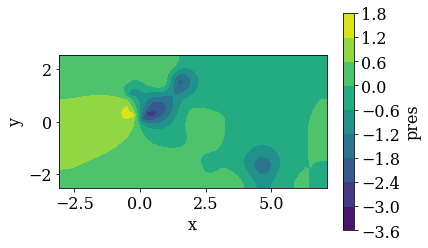

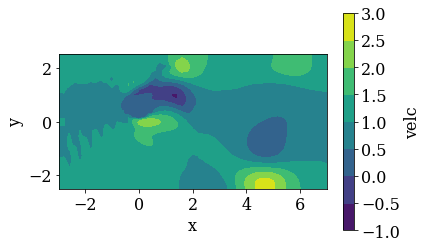

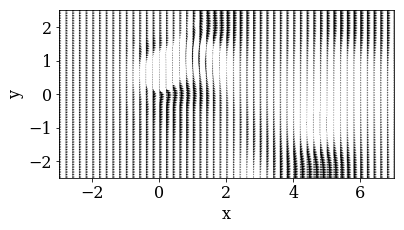

------------ Time = 7.009999999999895 ---------------
Number of poisson iterations    : 468
Final poisson residual : 9.298940774634004e-11
Max, Min, U   : 2.7294587544028728, -0.5904241960966172
Max, Min, V   : 1.7711880942095102, -1.3999711115200892
Max, Min, P   : 1.396324579963261, -3.3802279038882457
Max, Min, DIV : 6.619387121764575e-09, -6.8105435180321194e-09


------------ Time = 7.019999999999895 ---------------
Number of poisson iterations    : 435
Final poisson residual : 9.525642421803066e-11
Max, Min, U   : 2.7339251986631568, -0.5959324812488945
Max, Min, V   : 1.7666901397832389, -1.401577892520407
Max, Min, P   : 1.3866976859548763, -3.349662546119588
Max, Min, DIV : 6.701633137318197e-09, -6.620953507674443e-09


------------ Time = 7.0299999999998946 ---------------
Number of poisson iterations    : 465
Final poisson residual : 9.75392477452647e-11
Max, Min, U   : 2.737560609419877, -0.5984853838546682
Max, Min, V   : 1.7638124345566677, -1.4550276874701586
Max, Min, 

------------ Time = 7.23999999999989 ---------------
Number of poisson iterations    : 487
Final poisson residual : 9.430697643693031e-11
Max, Min, U   : 2.7330773563119157, -0.4750898499643062
Max, Min, V   : 1.6171955976694472, -1.5126730393658587
Max, Min, P   : 1.5878468426393832, -3.762958324279613
Max, Min, DIV : 6.87916279495937e-09, -6.8823170773502085e-09


------------ Time = 7.24999999999989 ---------------
Number of poisson iterations    : 485
Final poisson residual : 9.480066092040416e-11
Max, Min, U   : 2.7305095315395524, -0.4643149977361072
Max, Min, V   : 1.6048050914255274, -1.5805933633498648
Max, Min, P   : 2.427204055011469, -4.463672143727947
Max, Min, DIV : 7.015302089241615e-09, -7.339754082291705e-09


------------ Time = 7.25999999999989 ---------------
Number of poisson iterations    : 470
Final poisson residual : 8.681555565675292e-11
Max, Min, U   : 2.7273522251638678, -0.45591337448666447
Max, Min, V   : 1.5923320180787375, -1.5675949197495884
Max, Min, P 

------------ Time = 7.479999999999885 ---------------
Number of poisson iterations    : 459
Final poisson residual : 9.38984733945126e-11
Max, Min, U   : 2.7186581697250483, -0.35475625855473863
Max, Min, V   : 1.4832551441454838, -1.7737016823330491
Max, Min, P   : 1.6847059669742772, -2.9517796242413037
Max, Min, DIV : 5.103844846754413e-09, -5.404865444091911e-09


------------ Time = 7.489999999999885 ---------------
Number of poisson iterations    : 488
Final poisson residual : 9.942567258205931e-11
Max, Min, U   : 2.719796287577827, -0.3447444923410632
Max, Min, V   : 1.4753621941556454, -1.7916838613981354
Max, Min, P   : 1.5927745344712951, -3.4859471977684118
Max, Min, DIV : 6.477978431451703e-09, -6.108764605272654e-09


------------ Time = 7.4999999999998845 ---------------
Number of poisson iterations    : 520
Final poisson residual : 9.572803289097121e-11
Max, Min, U   : 2.72033704935466, -0.3331175721979272
Max, Min, V   : 1.466545272896639, -1.8072043589726132
Max, Min, 

------------ Time = 7.71999999999988 ---------------
Number of poisson iterations    : 477
Final poisson residual : 9.003712923511805e-11
Max, Min, U   : 2.7186437980410867, -0.13425013722378007
Max, Min, V   : 1.3868711679862789, -2.003783740435841
Max, Min, P   : 1.5027672414450746, -2.364626237587772
Max, Min, DIV : 7.514190381030517e-09, -5.6630078404396045e-09


------------ Time = 7.72999999999988 ---------------
Number of poisson iterations    : 477
Final poisson residual : 9.20349241594777e-11
Max, Min, U   : 2.7163804719956754, -0.1265635285648445
Max, Min, V   : 1.3798419145989722, -2.007243418086339
Max, Min, P   : 1.432574810078203, -2.7557809545975163
Max, Min, DIV : 6.5745675570383355e-09, -5.435221162031212e-09


------------ Time = 7.739999999999879 ---------------
Number of poisson iterations    : 490
Final poisson residual : 9.660872255280826e-11
Max, Min, U   : 2.713731589019507, -0.13284287423808824
Max, Min, V   : 1.3713740688864826, -2.0083967850839275
Max, Min, P

------------ Time = 7.949999999999875 ---------------
Number of poisson iterations    : 455
Final poisson residual : 8.943495131014156e-11
Max, Min, U   : 2.781373239307936, -0.20146198244782526
Max, Min, V   : 1.3118227717914046, -2.06519115566982
Max, Min, P   : 1.3083189569280584, -1.7914300603425324
Max, Min, DIV : 9.963277536328974e-09, -6.917552308749464e-09


------------ Time = 7.959999999999875 ---------------
Number of poisson iterations    : 485
Final poisson residual : 8.490860717718565e-11
Max, Min, U   : 2.7842296186168767, -0.20736501084115305
Max, Min, V   : 1.3038517952348785, -2.071631020081122
Max, Min, P   : 2.2508071912246987, -2.3910740338097964
Max, Min, DIV : 6.488204196131164e-09, -4.8799316532122106e-09


------------ Time = 7.9699999999998745 ---------------
Number of poisson iterations    : 476
Final poisson residual : 9.748385234850906e-11
Max, Min, U   : 2.7867579596429106, -0.20915734635436653
Max, Min, V   : 1.2957651976811089, -2.0787360729479896
Max, M

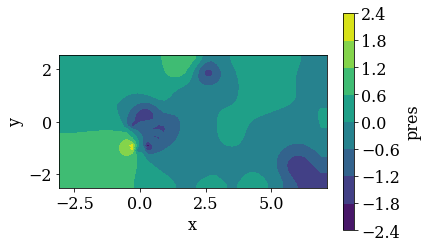

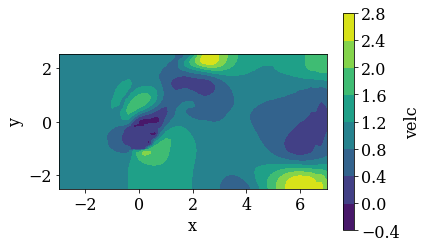

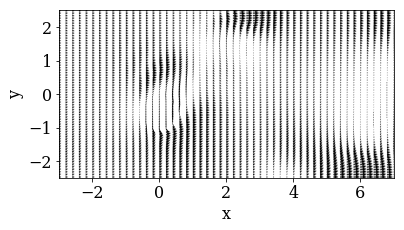

------------ Time = 8.009999999999874 ---------------
Number of poisson iterations    : 440
Final poisson residual : 9.880605210349887e-11
Max, Min, U   : 2.7935085781542335, -0.21425989978339705
Max, Min, V   : 1.2882762052243468, -2.1012872034562964
Max, Min, P   : 1.8380140850645694, -1.901799745939709
Max, Min, DIV : 5.908647668362299e-09, -5.582965201256229e-09


------------ Time = 8.019999999999873 ---------------
Number of poisson iterations    : 461
Final poisson residual : 9.155632200501141e-11
Max, Min, U   : 2.7943730950555965, -0.20950029736984876
Max, Min, V   : 1.2903628802861824, -2.1039855709513975
Max, Min, P   : 1.3674701134428897, -1.5924869913924877
Max, Min, DIV : 5.9483809544680355e-09, -5.297966509942853e-09


------------ Time = 8.029999999999873 ---------------
Number of poisson iterations    : 448
Final poisson residual : 9.745389927515383e-11
Max, Min, U   : 2.7949167663899503, -0.21178573252944669
Max, Min, V   : 1.2915315438197583, -2.107979349969244
Max, 

------------ Time = 8.239999999999869 ---------------
Number of poisson iterations    : 461
Final poisson residual : 8.966047031843334e-11
Max, Min, U   : 2.9999539143265794, -0.2507183966525203
Max, Min, V   : 1.2477037446677208, -2.1145737370928903
Max, Min, P   : 1.1824486590514072, -2.002429892724041
Max, Min, DIV : 5.316945217437308e-09, -6.788100470611624e-09


------------ Time = 8.249999999999869 ---------------
Number of poisson iterations    : 439
Final poisson residual : 9.41874056837322e-11
Max, Min, U   : 3.0161720935567566, -0.2426161587070622
Max, Min, V   : 1.2392828577100425, -2.123857017078697
Max, Min, P   : 1.017677524918767, -2.011455353183704
Max, Min, DIV : 5.5362256445867786e-09, -5.248881329578126e-09


------------ Time = 8.259999999999868 ---------------
Number of poisson iterations    : 462
Final poisson residual : 9.760994723638158e-11
Max, Min, U   : 3.031820387016274, -0.21521494173889075
Max, Min, V   : 1.2296487804573142, -2.1339347656650514
Max, Min, P

------------ Time = 8.469999999999864 ---------------
Number of poisson iterations    : 463
Final poisson residual : 9.995725829148531e-11
Max, Min, U   : 3.1991506068653015, -0.2980432329639078
Max, Min, V   : 1.1428025004056095, -2.21168094273604
Max, Min, P   : 0.9888856595485095, -2.4110068853143134
Max, Min, DIV : 6.056420920330652e-09, -5.89045923149456e-09


------------ Time = 8.479999999999864 ---------------
Number of poisson iterations    : 452
Final poisson residual : 9.578271363986917e-11
Max, Min, U   : 3.19809186981442, -0.3138728457574481
Max, Min, V   : 1.138696647622201, -2.209761595952887
Max, Min, P   : 0.8939491883442681, -2.396063298858238
Max, Min, DIV : 5.587757478942024e-09, -6.190455564825115e-09


------------ Time = 8.489999999999863 ---------------
Number of poisson iterations    : 449
Final poisson residual : 9.343615088054095e-11
Max, Min, U   : 3.1960929333626003, -0.3249875192848108
Max, Min, V   : 1.1340956587673636, -2.208753612391555
Max, Min, P   : 

------------ Time = 8.719999999999859 ---------------
Number of poisson iterations    : 442
Final poisson residual : 9.785225852342348e-11
Max, Min, U   : 3.038816457890545, -0.438148650483574
Max, Min, V   : 1.1035839415515782, -2.16411671974197
Max, Min, P   : 1.0070825411881759, -2.054654483969887
Max, Min, DIV : 7.110261546205976e-09, -7.515252864465083e-09


------------ Time = 8.729999999999858 ---------------
Number of poisson iterations    : 442
Final poisson residual : 9.725458137973029e-11
Max, Min, U   : 3.029948466636306, -0.4377331079743664
Max, Min, V   : 1.1038043500185983, -2.1645637370266955
Max, Min, P   : 1.0055536951544972, -2.0354877967253784
Max, Min, DIV : 7.069289459371575e-09, -7.4246736536665026e-09


------------ Time = 8.739999999999858 ---------------
Number of poisson iterations    : 442
Final poisson residual : 9.725186875169999e-11
Max, Min, U   : 3.020153725572303, -0.4313566484189703
Max, Min, V   : 1.1040730899350575, -2.1667441914902232
Max, Min, P  

Max, Min, DIV : 4.9013226810501465e-09, -5.584199491703856e-09


------------ Time = 8.959999999999853 ---------------
Number of poisson iterations    : 449
Final poisson residual : 9.805250715520936e-11
Max, Min, U   : 3.0592835698197196, -0.5297211260398548
Max, Min, V   : 1.3048055178115252, -2.1305347983940646
Max, Min, P   : 1.095372375794161, -2.0422897396093416
Max, Min, DIV : 5.1486948038359515e-09, -5.599664176791919e-09


------------ Time = 8.969999999999853 ---------------
Number of poisson iterations    : 428
Final poisson residual : 8.967258845875998e-11
Max, Min, U   : 3.0503600043244217, -0.5328156292632884
Max, Min, V   : 1.329677517681963, -2.1235216529181296
Max, Min, P   : 1.1718056835141446, -2.020036777376723
Max, Min, DIV : 6.643050554089314e-09, -5.41435396517187e-09


------------ Time = 8.979999999999853 ---------------
Number of poisson iterations    : 443
Final poisson residual : 8.985688782223821e-11
Max, Min, U   : 3.057527790369927, -0.5350200440868926
Ma

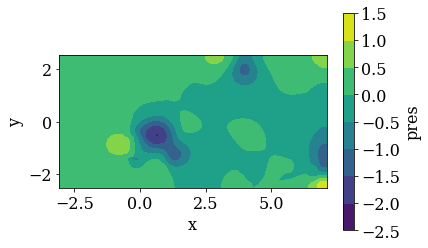

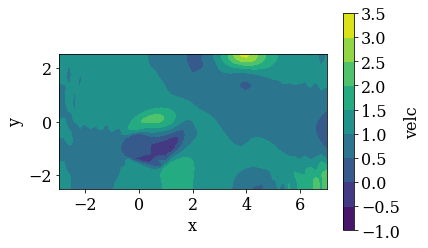

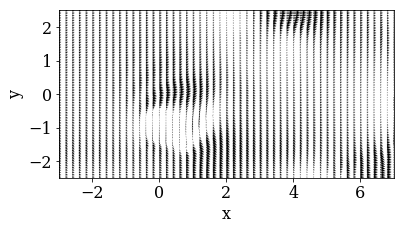

------------ Time = 9.009999999999852 ---------------
Number of poisson iterations    : 442
Final poisson residual : 9.675687119455082e-11
Max, Min, U   : 3.0834019919701015, -0.5450880775030263
Max, Min, V   : 1.4171008392080673, -2.1044093365942294
Max, Min, P   : 1.4297791568715275, -2.0284799335110586
Max, Min, DIV : 7.81335184052434e-09, -7.196348759952453e-09


------------ Time = 9.019999999999852 ---------------
Number of poisson iterations    : 440
Final poisson residual : 9.635743680783101e-11
Max, Min, U   : 3.0884978392167293, -0.5521253938350532
Max, Min, V   : 1.435895779075608, -2.097664487856883
Max, Min, P   : 1.4858932857928258, -2.033912198713814
Max, Min, DIV : 6.776370575778401e-09, -8.209874585718424e-09


------------ Time = 9.029999999999852 ---------------
Number of poisson iterations    : 457
Final poisson residual : 9.408032666661149e-11
Max, Min, U   : 3.091736174140854, -0.5555436897443476
Max, Min, V   : 1.4538511128634326, -2.090634170767697
Max, Min, P  

------------ Time = 9.259999999999847 ---------------
Number of poisson iterations    : 473
Final poisson residual : 9.50591727357627e-11
Max, Min, U   : 3.0828932376334715, -0.5762841147428982
Max, Min, V   : 1.622425848355338, -1.948321111391659
Max, Min, P   : 2.0369993947726903, -2.5194002675398703
Max, Min, DIV : 6.219339598878548e-09, -5.794819069038226e-09


------------ Time = 9.269999999999847 ---------------
Number of poisson iterations    : 463
Final poisson residual : 9.815995025795308e-11
Max, Min, U   : 3.0864125340040283, -0.5896186610549363
Max, Min, V   : 1.6228152613782858, -1.9428223605920012
Max, Min, P   : 2.0596415935990624, -2.39817083257619
Max, Min, DIV : 5.4171789276580284e-09, -5.548750348083331e-09


------------ Time = 9.279999999999847 ---------------
Number of poisson iterations    : 442
Final poisson residual : 9.32670069164831e-11
Max, Min, U   : 3.0881083698832947, -0.5974509607044315
Max, Min, V   : 1.6220702607589723, -1.9376561021781458
Max, Min, P 

------------ Time = 9.509999999999842 ---------------
Number of poisson iterations    : 465
Final poisson residual : 9.617073330729586e-11
Max, Min, U   : 3.0448576584732185, -0.5030374070168028
Max, Min, V   : 1.6986351615131317, -1.7959064186105071
Max, Min, P   : 1.7400409420325251, -3.1907770683035435
Max, Min, DIV : 8.853336952441282e-09, -7.030139803632096e-09


------------ Time = 9.519999999999841 ---------------
Number of poisson iterations    : 453
Final poisson residual : 9.184728067517316e-11
Max, Min, U   : 3.04698005952074, -0.5144331217452028
Max, Min, V   : 1.7007423672522572, -1.7868552015958157
Max, Min, P   : 1.7325364882998373, -3.1330734388843906
Max, Min, DIV : 8.363467696170801e-09, -7.510166932789275e-09


------------ Time = 9.529999999999841 ---------------
Number of poisson iterations    : 465
Final poisson residual : 8.219050322933921e-11
Max, Min, U   : 3.047453723178956, -0.520420613973249
Max, Min, V   : 1.7096632764665671, -1.7781511880345513
Max, Min, P

------------ Time = 9.749999999999837 ---------------
Number of poisson iterations    : 483
Final poisson residual : 9.479968967761975e-11
Max, Min, U   : 2.983603034106657, -0.44926527825087703
Max, Min, V   : 1.6509552069064466, -1.6862146271576428
Max, Min, P   : 2.408058722486472, -4.075476178084017
Max, Min, DIV : 5.9809031338620144e-09, -6.247193734543188e-09


------------ Time = 9.759999999999836 ---------------
Number of poisson iterations    : 468
Final poisson residual : 8.946948837385078e-11
Max, Min, U   : 2.986830518359313, -0.43431327599986075
Max, Min, V   : 1.6413700459666887, -1.6786002154587392
Max, Min, P   : 2.2802811227212656, -3.2661558053398827
Max, Min, DIV : 6.112140503791719e-09, -6.291875024461158e-09


------------ Time = 9.769999999999836 ---------------
Number of poisson iterations    : 464
Final poisson residual : 9.934452175895396e-11
Max, Min, U   : 2.988598391972277, -0.4182556767571378
Max, Min, V   : 1.6269994067329858, -1.6727033912597657
Max, Min,

------------ Time = 9.989999999999831 ---------------
Number of poisson iterations    : 481
Final poisson residual : 9.587956015260445e-11
Max, Min, U   : 2.9323487309419676, -0.29059087190347915
Max, Min, V   : 1.829547258081019, -1.576765525823117
Max, Min, P   : 1.532045546872199, -3.0284151917502715
Max, Min, DIV : 7.326551781927648e-09, -6.4491456619464316e-09


------------ Time = 9.999999999999831 ---------------
Number of poisson iterations    : 489
Final poisson residual : 9.832945426752887e-11
Max, Min, U   : 2.937329068256902, -0.2768583289113376
Max, Min, V   : 1.8329061199978822, -1.5696693384694964
Max, Min, P   : 2.269562412234756, -3.5776996983479488
Max, Min, DIV : 5.35637989865223e-09, -7.050576233957884e-09




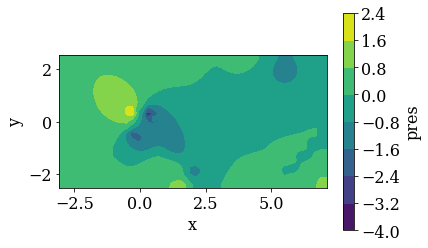

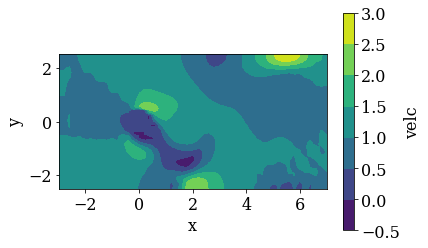

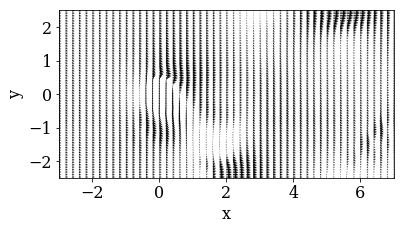

------------ Time = 10.009999999999831 ---------------
Number of poisson iterations    : 465
Final poisson residual : 9.512103178971668e-11
Max, Min, U   : 2.9410237162733472, -0.26089021277138474
Max, Min, V   : 1.8346031239319898, -1.561569507920135
Max, Min, P   : 2.09890611568322, -2.8380888811168328
Max, Min, DIV : 5.781730802456586e-09, -6.9098864130534565e-09




In [4]:
while scalars.variable['time'] <= scalars.variable['tmax']:
    
    imbound.map_to_grid(domain_data_struct)

    ins.advance(poisson, imbound, domain_data_struct)

    for particle in particles:
        particle.advance(scalars)

    scalars.advance()
    
    # Display stats
    if scalars.variable['nstep'] % 1 == 0:
        flowx.io.display_stats(scalars)  
        
    if scalars.variable['nstep'] % 100 == 0:
        flowx.io.plot_contour(gridc, 'pres')
        flowx.io.plot_contour(gridx, 'velc')
        flowx.io.plot_vector(gridx,gridy,'velc')
              

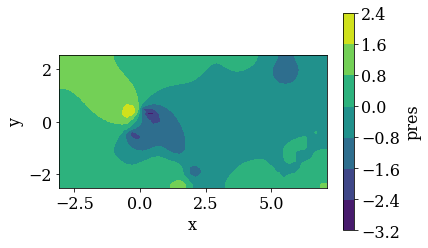

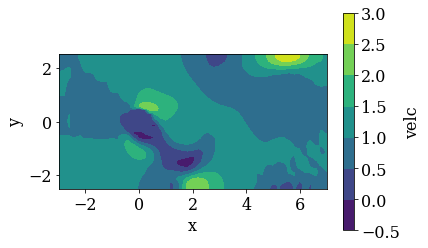

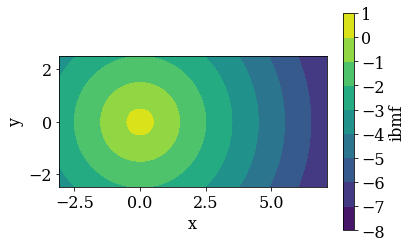

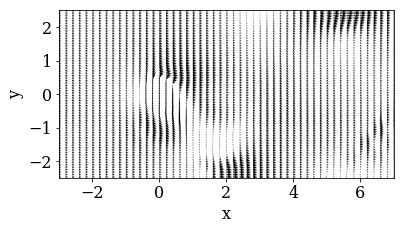

In [5]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridy, 'ibmf')
flowx.io.plot_vector(gridx,gridy,'velc')